In [ ]:
# Import all the necessary packages
import numpy as np
import nibabel as nib
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## 1. Explore the Data

### 1.1 Loading Images of the Brain



In [ ]:
# Define the image path and load the data
image_path = "data/BraTS-Data/imagesTr/BRATS_001.nii.gz"
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>


### 1.2 Extract the Data as a Numpy Array


In [ ]:
# Extract data as numpy ndarray
image_data = image_obj.get_fdata()
type(image_data)
print(image_data.shape)

(240, 240, 155, 4)


In [ ]:
# Get the image shape and print it out
height, width, depth, channels = image_data.shape
print(f"The image object has the following dimensions: height: {height}, width:{width}, depth:{depth}, channels:{channels}")

The image object has the following dimensions: height: 240, width:240, depth:155, channels:4


As you can see these "image objects" are actually 4 dimensional! With the exploratory steps below you'll get a better sense of exactly what each of these dimensions represents.

### 1.3 Visualize the Data
The "depth" listed above indicates that there are 155 layers (slices through the brain) in every image object. To visualize a single layer, run the cell below. Note that if the layer is one of the first or the last (`i` near 0 or 154), you won't find much information and the screen will be dark. Run this cell multiple times to look at different layers.
The code is set up to grab a random layer but you can select a specific layer by choosing a value for `i` from 0 to 154.


Plotting Layer 116 Channel 1 of Image


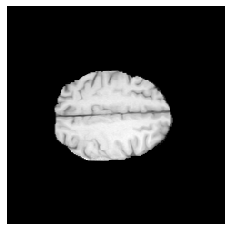

In [ ]:
# Select random layer number
maxval = 124
i = np.random.randint(0, maxval)
# Define a channel to look at
channel =1
print(f"Plotting Layer {i} Channel {channel} of Image")
plt.imshow(image_data[:, :, i, channel], cmap='gray')
plt.axis('off');

#### 1.3.1 Interactive Exploration
Another way to visualize this dataset is by using IPython Widgets to allow for an interactive exploration of the data.


In [ ]:

def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    channel = 2
    plt.imshow(image_data[:, :, layer, channel], cmap='gray')
    plt.title(f'Explore Layer {layer}, Channel {channel} of Brain MRI', fontsize=20)
    plt.axis('off')
    plt.show()
    return layer

# Use widgets.IntSlider for better control
layer_slider = widgets.IntSlider(value=0, min=0, max=image_data.shape[2] - 1, step=1, description='Layer')

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage, layer=layer_slider);



interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

## 2. Explore the Data Labels
In this section, we'll read in a new dataset containing the labels for the MRI scan you loaded above.


In [ ]:
# Define the data path and load the data
label_path = "data/BraTS-Data/labelsTr/BRATS_001.nii.gz"
label_obj = nib.load(label_path)
type(label_obj)

nibabel.nifti1.Nifti1Image

### 2.1 Extract the Data Labels as a Numpy Array
Run the next cell to extract the data labels using the `get_fdata()` method of the image object

In [ ]:
# Extract data labels
label_array = label_obj.get_fdata()
type(label_array)

numpy.ndarray

In [ ]:
# Extract and print out the shape of the labels data
height, width, depth = label_array.shape
print(f"Dimensions of labels data array height: {height}, width: {width}, depth: {depth}")
print(f'With the unique values: {np.unique(label_array)}')
print("""Corresponding to the following label categories:
0: for normal
1: for edema
2: for non-enhancing tumor
3: for enhancing tumor""")


Dimensions of labels data array height: 240, width: 240, depth: 155
With the unique values: [0. 1. 2. 3.]
Corresponding to the following label categories: 
0: for normal 
1: for edema
2: for non-enhancing tumor 
3: for enhancing tumor


### 2.2 Visualize the Labels for a Specific Layer


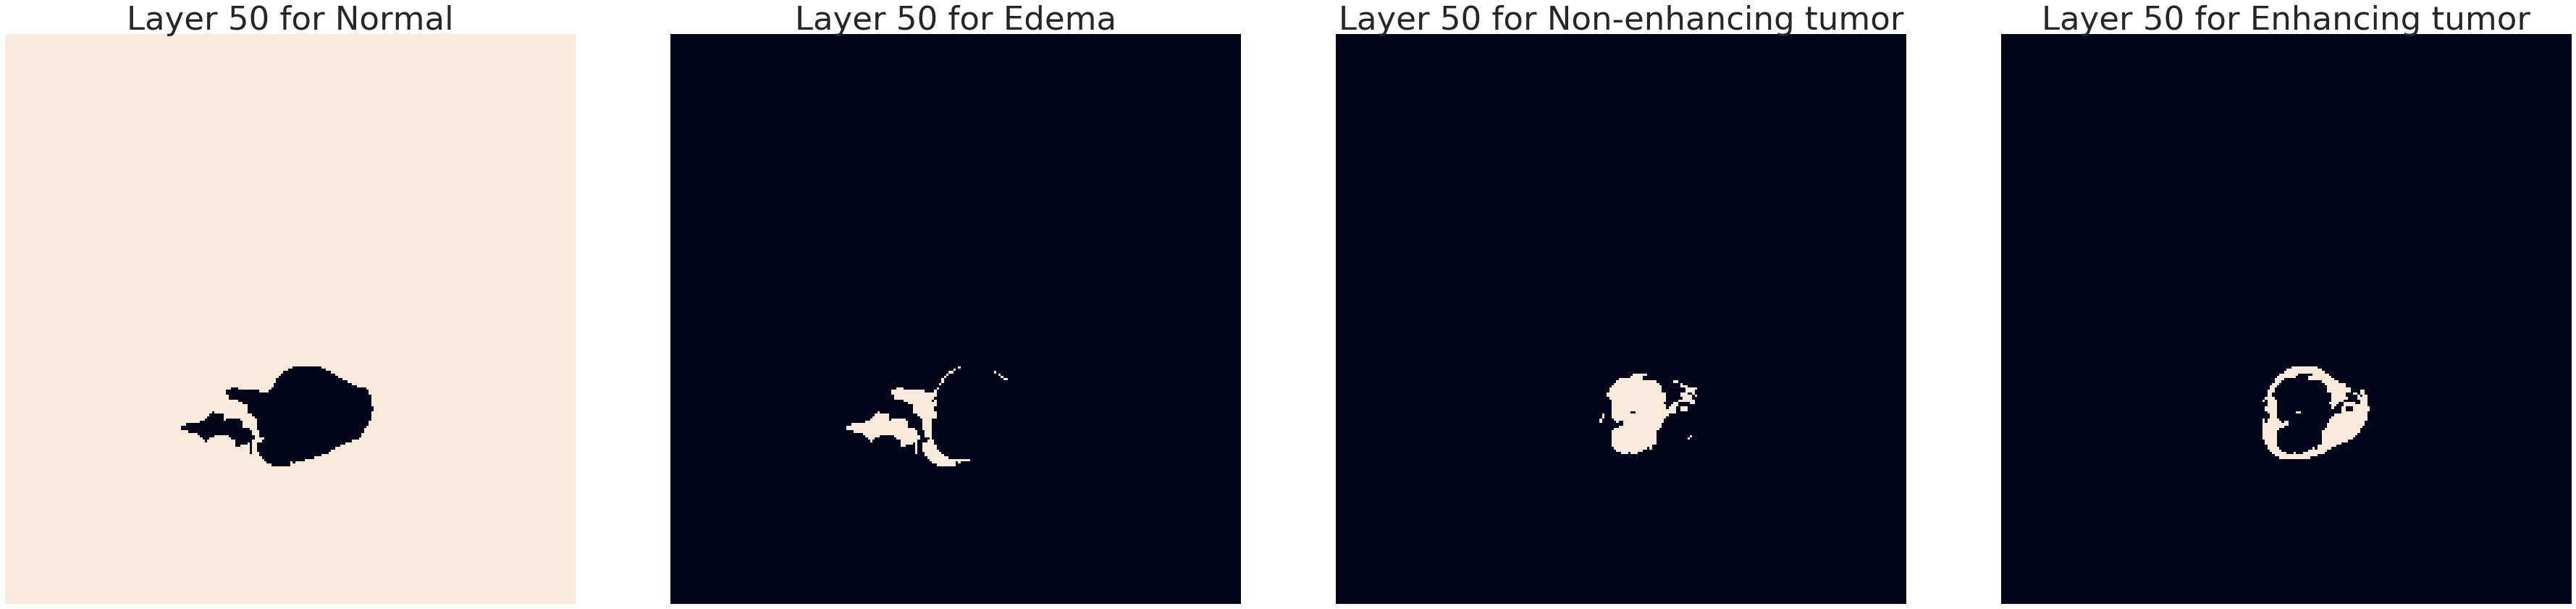

In [ ]:
# Set up for plotting
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i, (img_label_str, class_value) in enumerate(classes_dict.items()):
    img = label_array[:, :, layer]
    mask = np.where(img == class_value, 255, 0)
    ax[i].imshow(mask)
    ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
    ax[i].axis('off')
plt.tight_layout()


#### 2.2.1 Interactive Visualization Across Layers
As another way of looking at the data, run the code below to create a visualization where you can choose the class you want to look at by clicking a button to choose a particular label and scrolling across layers using the slider!

In [ ]:
# Create button values
select_class = ToggleButtons(
    options=['Normal','Edema', 'Non-enhancing tumor', 'Enhancing tumor'],
    description='Select Class:',
    disabled=False,
    button_style='info',

)
# Create layer slider
select_layer = IntSlider(min=0, max=154, description='Select Layer', continuous_update=False)


# Define a function for plotting images
def plot_image(seg_class, layer):
    print(f"Plotting {layer} Layer Label: {seg_class}")
    img_label = classes_dict[seg_class]
    mask = np.where(label_array[:,:,layer] == img_label, 255, 0)
    plt.figure(figsize=(10,5))
    plt.imshow(mask, cmap='gray')
    plt.axis('off');

# Use the interactive() tool to create the visualization
interactive(plot_image, seg_class=select_class, layer=select_layer)

interactive(children=(ToggleButtons(button_style='info', description='Select Class:', options=('Normal', 'Edem…